In [132]:
import numpy as np
import pandas as pd
import math

from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
# df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1')
# df = df.drop(0)
# df = df.reset_index()
# df.drop('index',axis=1,inplace = True)

In [134]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

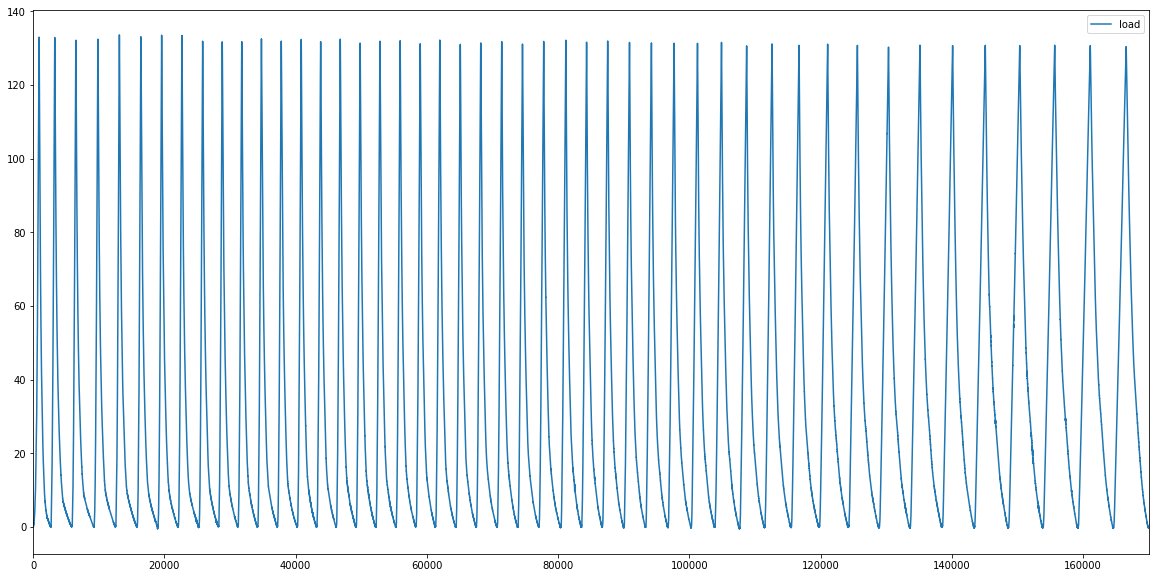

In [135]:
df.plot(y='load',figsize=(20,10))

In [136]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
# from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix

In [137]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [138]:
# fix random seed for reproducibility
numpy.random.seed(7)
# dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [139]:
# load the dataset
dataframe = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
dataframe.columns = ['time','load']
dataframe.drop('time',inplace=True,axis=1)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset

In [140]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [141]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [142]:
print(train.shape)
print(test.shape)

(113967, 1)
(56134, 1)


In [189]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [190]:
# print(trainX)
# print(trainY)
# print(testX)
# print(testY)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(113965, 1)
(113965,)
(56132, 1)
(56132,)


In [191]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [192]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(113965, 1, 1)
(113965,)
(56132, 1, 1)
(56132,)


In [147]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
5s - loss: 0.0059
Epoch 2/50
5s - loss: 1.7359e-05
Epoch 3/50
5s - loss: 6.4211e-06
Epoch 4/50
5s - loss: 1.4072e-06
Epoch 5/50
5s - loss: 1.3079e-06
Epoch 6/50
5s - loss: 1.2711e-06
Epoch 7/50
5s - loss: 1.2421e-06
Epoch 8/50
5s - loss: 1.2575e-06
Epoch 9/50
5s - loss: 1.2600e-06
Epoch 10/50
5s - loss: 1.2623e-06
Epoch 11/50
5s - loss: 1.2620e-06
Epoch 12/50
5s - loss: 1.2471e-06
Epoch 13/50
5s - loss: 1.2368e-06
Epoch 14/50
5s - loss: 1.2207e-06
Epoch 15/50
5s - loss: 1.2524e-06
Epoch 16/50
5s - loss: 1.2733e-06
Epoch 17/50
5s - loss: 1.2378e-06
Epoch 18/50
5s - loss: 1.2518e-06
Epoch 19/50
5s - loss: 1.2501e-06
Epoch 20/50
5s - loss: 1.2347e-06
Epoch 21/50
5s - loss: 1.2533e-06
Epoch 22/50
5s - loss: 1.2337e-06
Epoch 23/50
5s - loss: 1.2360e-06
Epoch 24/50
5s - loss: 1.2282e-06
Epoch 25/50
5s - loss: 1.2557e-06
Epoch 26/50
5s - loss: 1.2377e-06
Epoch 27/50
5s - loss: 1.2450e-06
Epoch 28/50
5s - loss: 1.2506e-06
Epoch 29/50
5s - loss: 1.2516e-06
Epoch 30/50
5s - loss: 1.23

In [193]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [194]:
testX.shape

(56132, 1, 1)

In [195]:
import copy
testPredictCopy = copy.deepcopy(testPredict)

print(testPredictCopy.shape)

for i in range(10000):
    new_point = testPredictCopy[-1]
#     print(new_point.shape)
    new_point = np.reshape(new_point, (new_point.shape[0],1,1))
    new_point_prediction = model.predict(new_point)
#     print("new point prediction shape = {}".format(new_point_prediction.shape))
#     print(testPredictCopy.shape)
    testPredictCopy = np.append(testPredictCopy,new_point_prediction)
    testPredictCopy = np.reshape(testPredictCopy,(testPredictCopy.shape[0],1))
# testPredictCopy = np.append(testPredictCopy,np.reshape(new_point_prediction,(new_point_prediction.shape[0],1)))

print(testPredictCopy.shape)

(56132, 1)
(66132, 1)


In [196]:
print(testPredict)
print(testPredictCopy)

[[ 0.14616601]
 [ 0.14599837]
 [ 0.14572467]
 ..., 
 [ 0.00584146]
 [ 0.00570566]
 [ 0.00582557]]
[[ 0.14616601]
 [ 0.14599837]
 [ 0.14572467]
 ..., 
 [ 1.03598416]
 [ 1.03598416]
 [ 1.03598416]]


In [197]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
testPredictCopy = scaler.inverse_transform(testPredictCopy)

In [198]:
print(testPredictCopy.shape)
print(testPredict.shape)

(66132, 1)
(56132, 1)


In [199]:
print(testY[0][-1])
print(testY)
print(testY.shape)

0.0600600129521
[[ 18.87359088  18.83697013  18.86473118 ...,   0.03399003   0.05023997
    0.06006001]]
(1, 56132)


In [200]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.17 RMSE
Test Score: 0.14 RMSE


In [201]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [202]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot = np.append(testPredictPlot,np.zeros((100,1)))
print(testPredictPlot.shape)
testPredictPlot = np.reshape(testPredictPlot,(testPredictPlot.shape[0],1))
# testPredictPlot[:, :] = numpy.nan
print(testPredictPlot.shape)
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredictCopy

(170201,)
(170201, 1)


ValueError: could not broadcast input array from shape (66132,1) into shape (56132,1)

In [203]:
print(trainPredict.shape)
print(testPredictCopy.shape)
testPredictPlot = np.append(trainPredict,testPredictCopy)
testPredictPlot = np.reshape(testPredictPlot,(testPredictPlot.shape[0],1))

(113965, 1)
(66132, 1)


In [207]:
testPredictCopy

array([[  18.99900055],
       [  18.97649956],
       [  18.93976593],
       ..., 
       [ 138.42430115],
       [ 138.42430115],
       [ 138.42430115]], dtype=float32)

In [204]:
# plt.figure(figsize=(15,15))

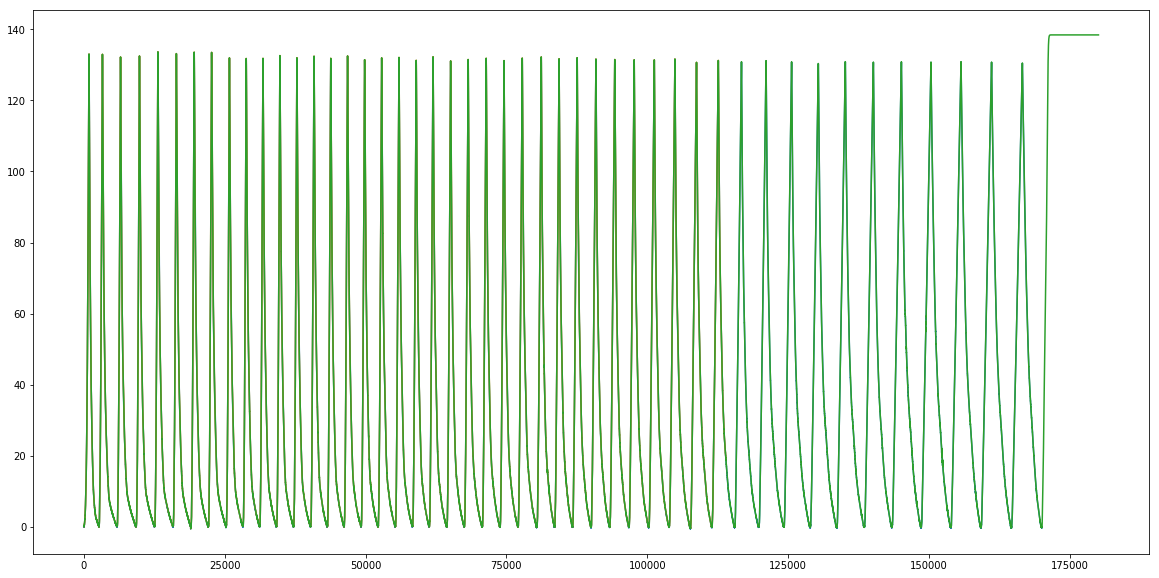

In [205]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# plt.savefig('fig2.pdf')
plt.show()

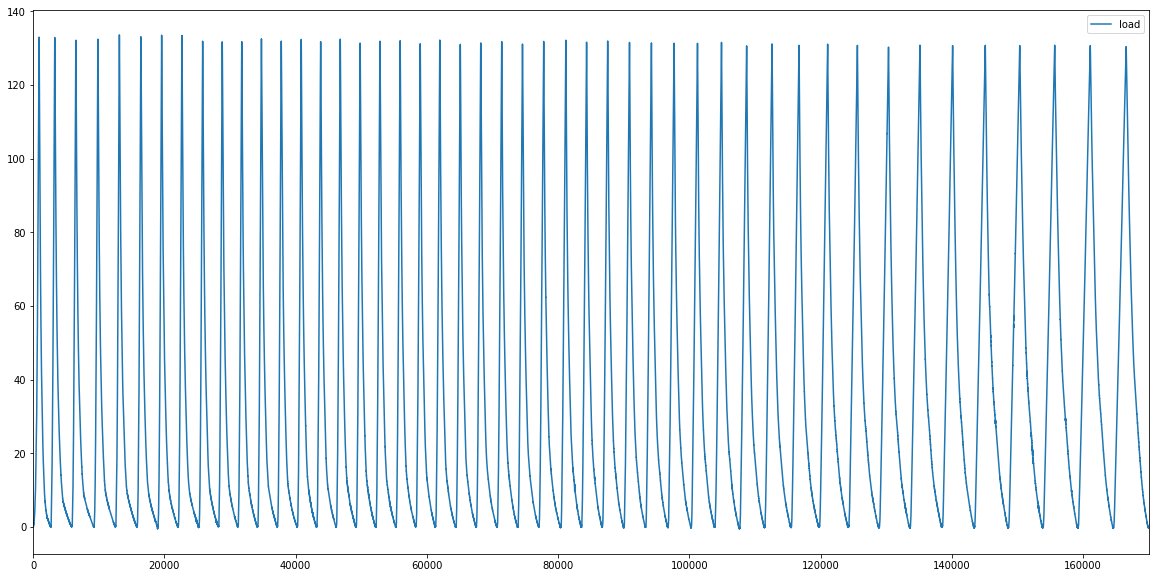

In [183]:
df.plot(y='load',figsize=(20,10))

In [ ]:
# get last of test


Predict --> transform
# put that into lstm
# get output and put inverse transform of the output into a list
# get the last output of the list and repeat the process

In [61]:
# trainX.shape

(113965, 1, 1)

In [92]:
# new_point = testPredict[-1]
# print(new_point)
# print(type(new_point))
# print(new_point.shape)
# new_point = np.reshape(new_point,(new_point.shape[0],1))
# print(new_point.shape)
# print(new_point)

[ 0.16345911]
<type 'numpy.ndarray'>
(1,)
(1, 1)
[[ 0.16345911]]


In [93]:
# trainX.shape

(113965, 1, 1)

In [94]:
# data_test = scaler.fit(dataset)
# new_point_transformed = scaler.transform(new_point)

In [95]:
# new_point_transformed

array([[ 0.16345909]], dtype=float32)